#### Preliminaries

First we import the libraries we will need, and the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
from matplotlib.patches import Rectangle

import matplotlib as mpl
#my_params = mpl.rcParams

%matplotlib inline

/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### A NOTE ON STATISTICAL TERMINOLOGY

Some familiarity with statistics, in particular with hypothesis testing, would be beneficial, but I have included a  list of essential **definitions at the end of the notebook**.

In [2]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')

#### Confidence interval for the correlation coefficient

given the confidence level of 95%, the number of wells (and from that the degrees of freedom), and the sample correlation coefficient, we can calculate the confidence interval for the population correlation coefficient (P97.5 and P2.5).

Here's a convenient function to calculate it; for the details of the calculation, see <a href = "http://brownmath.com/stat/correl.htm#CI"> Brown</a>.

In [3]:
def confInt(r, nwells):
    z_crit = sp.stats.norm.ppf(.975)
    std_Z = 1/np.sqrt(nwells-3)
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1)
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

Test to ensure we are getting same result as <a href = "http://brownmath.com/stat/correl.htm#CI"> Brown's example</a>:

In [4]:
print (confInt(0.84, 25))

(0.9273381388608292, 0.6658819489061664)


#### With 21 wells as in Hunt

#### Notice that the function can take directly arrays as parameters (broadcasting)

In [5]:
crr = np.arange(0.0,1.05,0.05).round(decimals=2)
cm21 = np.asarray(confInt(crr, 21)) 

In [6]:
CI21 = pd.DataFrame(cm21, index = ['CI_UPPER', 'CI_LOWER'], columns = [" r = " + mp for mp in map(str, crr)])

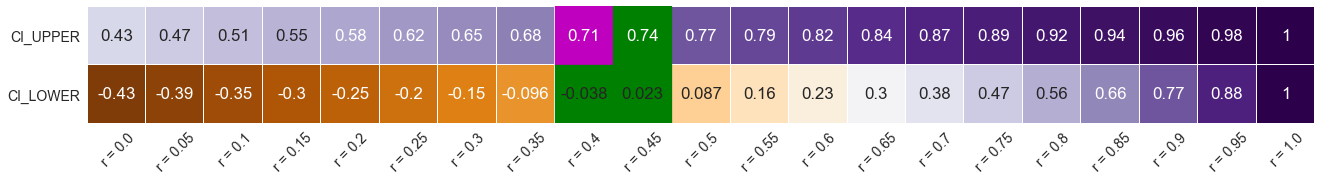

In [7]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(22,4))
h = sns.heatmap(CI21, annot=True, cmap='PuOr', square=True, linewidths=0.01, cbar=False)
plt.xticks(rotation=45)
h.add_patch(Rectangle((8,0), 1, 1, fill=True, color = 'm')) 
h.add_patch(Rectangle((8,1), 1, 1, fill=True, color = 'green')) 
h.add_patch(Rectangle((9,0), 1, 1, fill=True, color = 'green')) 
h.add_patch(Rectangle((9,1), 1, 1, fill=True, color = 'green'));

plt.savefig('CI_heatmap_21.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

This tells us a bit more than just the critical r test. 

Discuss as in **Chambers and Yarus (2002, Reference 4)**

We see that **Pressure ( r = 0.38)** would have lower confidence limit below zero, and that it that it takes at least a correlation coefficient of 0.45 (a bit of rounding: critical r = 0.43) to have both uppper and lower confidence limit positive **BUT** still the lower confidence limit is 0.023!!! 
but also.....

#### Interesting to see what happens with only 5 wells:

In [8]:
cm5 = np.asarray(confInt(crr, 5))

In [9]:
CI5 = pd.DataFrame(cm5, index = ['CI_UPPER', 'CI_LOWER'], columns = [" r = " + mp for mp in map(str, crr)])

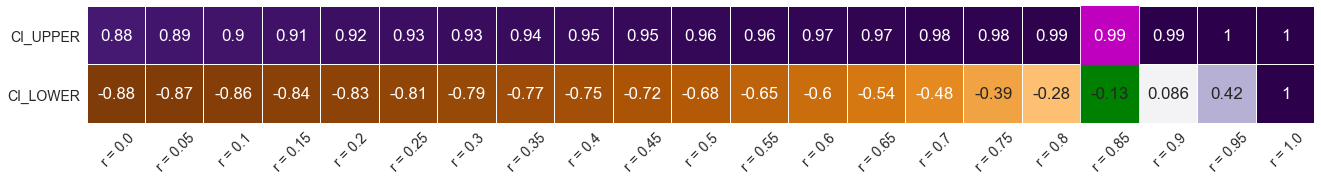

In [10]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(22,4))
h = sns.heatmap(CI5, annot=True, cmap='PuOr', square=True, linewidths=0.01, cbar=False)
plt.xticks(rotation=45)
h.add_patch(Rectangle((17,0), 1, 1, fill=True, color = 'm')) 
h.add_patch(Rectangle((17,1), 1, 1, fill=True, color = 'green')) ;

plt.savefig('CI_heatmap_5.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

#### With only 5 wells even Gross pay technically does not pass the test

In [11]:
cm5 = np.asarray(confInt(crr, 5))

In [12]:
cm5 = np.asarray(confInt(crr, 5))
CI5 = pd.DataFrame(cm5, index = ['CI_UPPER', 'CI_LOWER'], columns = [" r = " + mp for mp in map(str, crr)])

cm10 = np.asarray(confInt(crr, 10))
CI10 = pd.DataFrame(cm10, index = ['CI_UPPER', 'CI_LOWER'], columns = [" r = " + mp for mp in map(str, crr)])

cm15 = np.asarray(confInt(crr, 15))
CI15 = pd.DataFrame(cm15, index = ['CI_UPPER', 'CI_LOWER'], columns = [" r = " + mp for mp in map(str, crr)])

cm20 = np.asarray(confInt(crr, 20))
CI20 = pd.DataFrame(cm20, index = ['CI_UPPER', 'CI_LOWER'], columns = [" r = " + mp for mp in map(str, crr)])

cm25 = np.asarray(confInt(crr, 25))
CI25 = pd.DataFrame(cm25, index = ['CI_UPPER', 'CI_LOWER'], columns = [" r = " + mp for mp in map(str, crr)])

cm30 = np.asarray(confInt(crr, 30))
CI30 = pd.DataFrame(cm30, index = ['CI_UPPER', 'CI_LOWER'], columns = [" r = " + mp for mp in map(str, crr)])

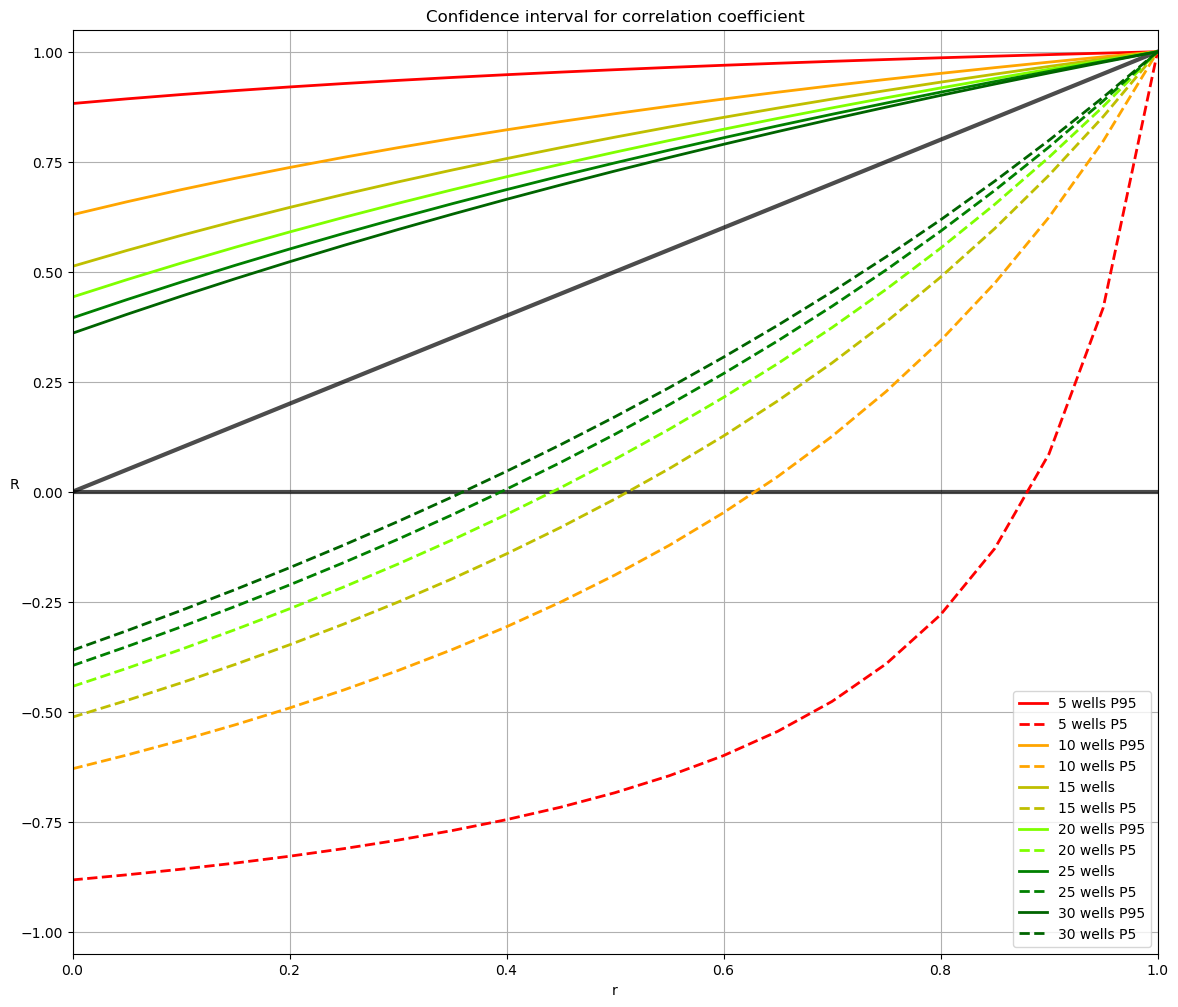

In [13]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(14,12))

plt.title('Confidence interval for correlation coefficient')

ax.set_ylim([-1.05,1.05])
ax.set_xlim([0, 1])
ax.set_ylabel('R', rotation = 0)
ax.set_xlabel('r', rotation = 0)

ax.plot( [0,1], [0, 1], 'k', linewidth= 3, alpha = 0.7)
ax.plot( [0,1], [0, 0], 'k', linewidth= 3, alpha = 0.7)
ax.plot(np.arange(0.00,1.05,0.05), cm5[0,:],  'r', linewidth= 2, label = '5 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm5[1,:], 'r--', linewidth= 2, label = '5 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm10[0,:],  'Orange', linewidth= 2, label = '10 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm10[1,:], '--', color = 'Orange', linewidth= 2, label = '10 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm15[0,:],  'y', linewidth= 2, label = '15 wells')
ax.plot(np.arange(0.00,1.05,0.05), cm15[1,:], 'y--', linewidth= 2, label = '15 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm20[0,:], 'chartreuse', linewidth= 2, label = '20 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm20[1,:], '--', color = 'chartreuse', linewidth= 2, label = '20 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm25[0,:],  'g', linewidth= 2, label = '25 wells')
ax.plot(np.arange(0.00,1.05,0.05), cm25[1,:], 'g--', linewidth= 2, label = '25 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm30[0,:],  'darkgreen', linewidth= 2, label = '30 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm30[1,:], '--', color = 'darkgreen', linewidth= 2, label = '30 wells P5')
plt.legend()
plt.grid();



### This is a test to plot the confidence interval with 5 wells and also mark the interval at a specific r

In [14]:
cm5_test_r06 = confInt(0.6, 5)
cm5_test_r06

(0.9692070969784793, -0.5997499978988459)

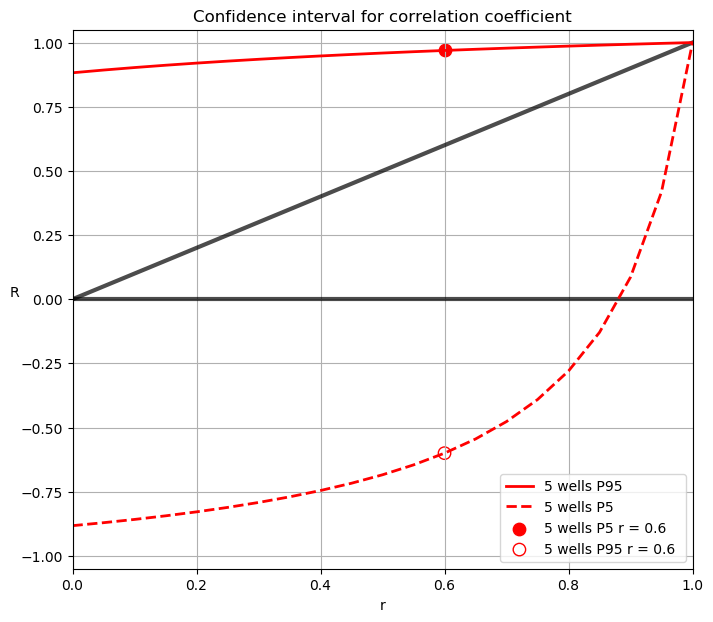

In [15]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(8,7))

plt.title('Confidence interval for correlation coefficient')

ax.set_ylim([-1.05,1.05])
ax.set_xlim([0, 1])
ax.set_ylabel('R', rotation = 0)
ax.set_xlabel('r', rotation = 0)

ax.plot( [0,1], [0, 1], 'k', linewidth= 3, alpha = 0.7)
ax.plot( [0,1], [0, 0], 'k', linewidth= 3, alpha = 0.7)
ax.plot(np.arange(0.00,1.05,0.05), cm5[0,:],  'r', linewidth= 2, label = '5 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm5[1,:], 'r--', linewidth= 2, label = '5 wells P5')
ax.scatter (0.6, cm5_test_r06[0], s=80, facecolors = 'r', edgecolors='r', label = '5 wells P5 r = 0.6 ')
ax.scatter (0.6, cm5_test_r06[1], s=80, facecolors = 'none', edgecolors='r', label = '5 wells P95 r = 0.6 ')
plt.legend()
plt.grid();



### This is a test to plot the confidence interval with 21 wells and also mark the interval at a specific r for two attributes

#### Critical r test

In [16]:
nwells, nfeatures = data.shape
print ('nunber of wells =', nwells)
print ('df =' ,nwells-2)

nunber of wells = 21
df = 19


In [17]:
t1 = sp.stats.t.isf(0.025, nwells-2) # required input is alpha/2

In [18]:
r_crit1 = t1/np.sqrt((nwells-2)+ np.power(t1,2))
print (r_crit1)

0.4328575563165211


In [19]:
crr = np.arange(0.0,1.02,0.02).round(decimals=2)
cm21 = np.asarray(confInt(crr, 21))
cm21_test_rGP = confInt(0.87, 21) # Gross Pay
cm21_test_rPr = confInt(0.38, 21) # Pressure

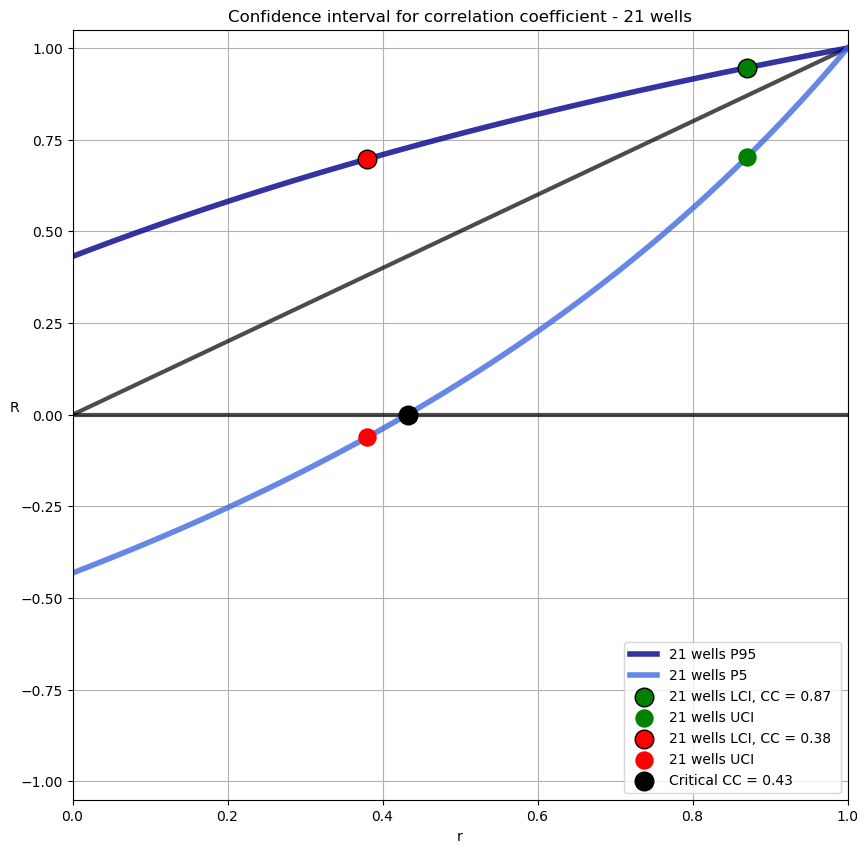

In [20]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(10,10))

plt.title('Confidence interval for correlation coefficient - 21 wells')

ax.set_ylim([-1.05,1.05])
ax.set_xlim([0, 1])
ax.set_ylabel('R', rotation = 0)
ax.set_xlabel('r', rotation = 0)

ax.plot( [0,1], [0, 1], 'k', linewidth= 3, alpha = 0.7)
ax.plot( [0,1], [0, 0], 'k', linewidth= 3, alpha = 0.7)
ax.plot(np.arange(0.00,1.02,0.02), cm21[0,:],  'darkblue', linewidth= 4, alpha = 0.8, label = '21 wells P95')
ax.plot(np.arange(0.00,1.02,0.02), cm21[1,:], 'royalblue', linewidth= 4, alpha = 0.8, label = '21 wells P5')

ax.scatter (0.87, cm21_test_rGP[0], s=180, facecolors = 'g', edgecolors='k', label = '21 wells LCI, CC = 0.87 ', zorder=10)
ax.scatter (0.87, cm21_test_rGP[1], s=150, facecolors = 'g', edgecolors='g', label = '21 wells UCI', zorder=10)
ax.scatter (0.38, cm21_test_rPr[0], s=180, facecolors = 'r', edgecolors='k', label = '21 wells LCI, CC = 0.38 ', zorder=10)
ax.scatter (0.38, cm21_test_rPr[1], s=150, facecolors = 'r', edgecolors='r', label = '21 wells UCI', zorder=10)


ax.scatter (r_crit1, 0, s=180, facecolors = 'k', edgecolors='k', label = 'Critical CC = ' + '{:.2f}'.format(r_crit1), zorder=10)

plt.legend(loc=4)
plt.grid();

plt.savefig('CI_21.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [21]:
cm5 = np.asarray(confInt(crr, 5))
cm5_test_rGP = confInt(0.87, 5) # Gross Pay
cm5_test_rPr = confInt(0.38, 5) # Pressure

In [22]:
t = sp.stats.t.isf(0.025, 5-2) # required input is alpha/2

In [23]:
r_crit = t/np.sqrt((5-2)+ np.power(t,2))
print (r_crit)

0.8783394481598402


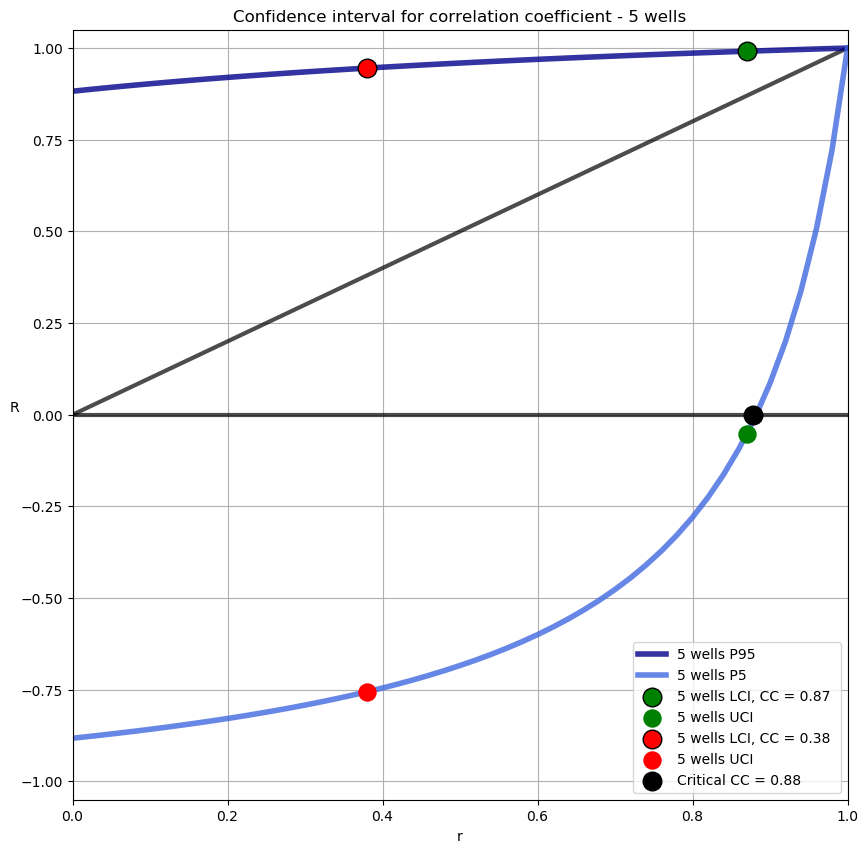

In [24]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(10,10))

plt.title('Confidence interval for correlation coefficient - 5 wells')

ax.set_ylim([-1.05,1.05])
ax.set_xlim([0, 1])
ax.set_ylabel('R', rotation = 0)
ax.set_xlabel('r', rotation = 0)

ax.plot( [0,1], [0, 1], 'k', linewidth= 3, alpha = 0.7)
ax.plot( [0,1], [0, 0], 'k', linewidth= 3, alpha = 0.7)
ax.plot(np.arange(0.00,1.02,0.02), cm5[0,:],  'darkblue', linewidth= 4, alpha = 0.8, label = '5 wells P95')
ax.plot(np.arange(0.00,1.02,0.02), cm5[1,:], 'royalblue', linewidth= 4, alpha = 0.8, label = '5 wells P5')

ax.scatter (0.87, cm5_test_rGP[0], s=180, facecolors = 'g', edgecolors='k', label = '5 wells LCI, CC = 0.87 ', zorder=10)
ax.scatter (0.87, cm5_test_rGP[1], s=150, facecolors = 'g', edgecolors='g', label = '5 wells UCI', zorder=10)
ax.scatter (0.38, cm5_test_rPr[0], s=180, facecolors = 'r', edgecolors='k', label = '5 wells LCI, CC = 0.38 ', zorder=10)
ax.scatter (0.38, cm5_test_rPr[1], s=150, facecolors = 'r', edgecolors='r', label = '5 wells UCI', zorder=10)


ax.scatter (r_crit, 0, s=180, facecolors = 'k', edgecolors='k', label = 'Critical CC = ' + '{:.2f}'.format(r_crit), zorder=10)

plt.legend(loc=4)
plt.grid();

plt.savefig('CI_5.png', dpi=300, bbox_inches='tight', pad_inches=0.1)